In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display
import numpy as np

In [41]:
bands = 8
sample_rate = 16000
n_fft = 512
hop_length=512

In [42]:
# calculating energy bands of the piano.wav file
def gen_energy_bands(audio_file):
    y, sr = librosa.load(audio_file, sr=sample_rate)
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    energy = np.abs(D)**2
    band_edges = np.linspace(0, sr/2, bands+1)

    energy_bands = []
    for i in range(bands):
            start = int(band_edges[i] / (sr/n_fft))
            end = int(band_edges[i+1] / (sr/n_fft))
            energy_band = np.sum(energy[start:end, :], axis=0)
            energy_bands.append(energy_band)
    
    return energy_bands, D

In [43]:
# calculate the code for the piano key stroke
def gen_code(energy_bands):
    codes = []
    prev_max_band = np.argmax(energy_bands[0])
    repeat_cnt = 0
    for i in range(1, len(energy_bands)):
        current_max_band = np.argmax(energy_bands[i])
        if current_max_band > prev_max_band:
            codes.append('U')
            repeat_cnt = 0
        elif current_max_band < prev_max_band:
            codes.append('D')
            repeat_cnt = 0
        else:
            repeat_cnt += 1
            codes.append(f"R{repeat_cnt}")
        prev_max_band = current_max_band
    return codes

In [44]:
def calculate_code(audio_file):
    energy_bands, D = gen_energy_bands(audio_file)
    codes = gen_code(energy_bands)
    print(f"The code for the {audio_file} is {codes}")
    
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 
    plt.figure() 
    librosa.display.specshow(S_db) 
    plt.colorbar()
    plt.show()
    # return codes

The code for the ./audio_data/piano.wav is ['U', 'R1', 'R2', 'D', 'D', 'U', 'U']


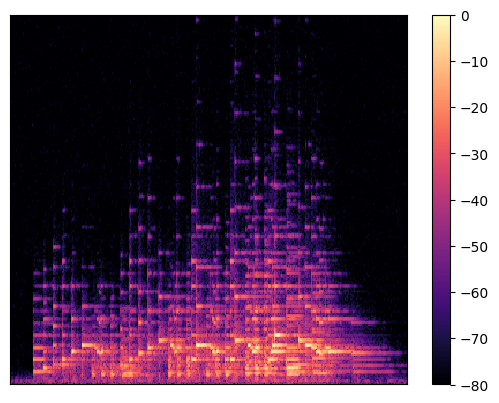

In [45]:
calculate_code("./audio_data/piano.wav")

The code for the ./audio_data/piano_stereo.wav is ['U', 'R1', 'R2', 'D', 'D', 'U', 'U']


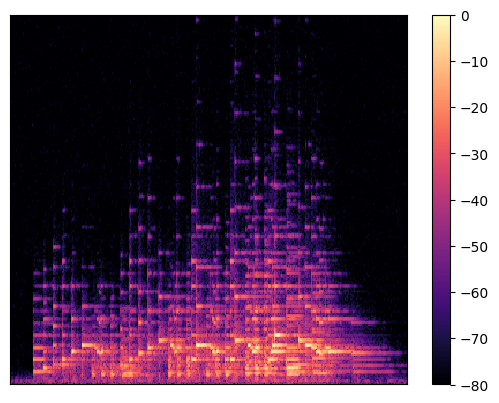

In [46]:
calculate_code("./audio_data/piano_stereo.wav")